In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")
pd.set_option("display.max_columns",100)
df.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,mon,1.283333,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,fri,0.200000,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,4.616667,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,thu,1.166667,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,fri,19.683333,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [3]:
df_test = pd.read_csv("test.csv")
df_test

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,mon,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,thu,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,fri,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,fri,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,customer_id_15908,48,services,married,high.school,no,yes,no,cellular,jul,mon,3.016667,2,999,0,nonexistent,1.43,46.9590,-29.89,5.962,5228.1
12353,customer_id_28222,40,services,divorced,high.school,unknown,yes,no,cellular,apr,tue,10.333333,1,2,1,success,-1.77,46.5375,-32.97,2.455,5099.1
12354,customer_id_14194,28,blue-collar,single,high.school,no,no,yes,telephone,jul,mon,4.183333,2,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1
12355,customer_id_19764,53,technician,divorced,professional.course,no,no,yes,cellular,aug,fri,0.833333,3,999,0,nonexistent,1.43,46.7220,-25.27,5.968,5228.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [5]:
df.isnull().sum()

customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subscribed        0
dtype: int64

In [6]:
df.describe(include="all")

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831,28831.000000,28831,28831,28831,28831,28831,28831,28831,28831,28831,28831.000000,28831.000000,28831.000000,28831.000000,28831,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
unique,28831,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,customer_id_3376,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,7338,17368,8530,22849,15096,23733,18339,9534,6020,NaN,NaN,NaN,NaN,24907,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,42.011203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.297919,2.575769,963.215844,0.172592,NaN,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,NaN,10.450128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.336882,2.752303,185.077567,0.494338,NaN,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,1.000000,999.000000,0.000000,NaN,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,999.000000,0.000000,NaN,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,3.000000,999.000000,0.000000,NaN,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000


In [7]:
df.dtypes

customer_id        object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
subscribed          int64
dtype: object

In [8]:
df["job"].unique()


array(['admin.', 'technician', 'blue-collar', 'services', 'entrepreneur',
       'unemployed', 'housemaid', 'management', 'unknown',
       'self-employed', 'retired', 'student'], dtype=object)

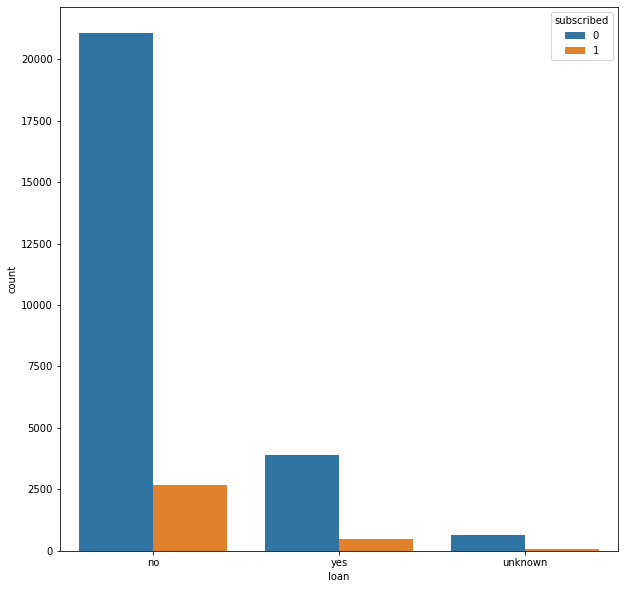

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["loan"],hue=df["subscribed"], data=df)
plt.xkcd()
plt.show()

In [10]:
df["age"].unique()

array([ 31,  47,  36,  34,  48,  39,  40,  43,  55,  29,  38,  30,  53,
        37,  65,  51,  42,  52,  26,  45,  32,  33,  35,  62,  41,  46,
        49,  44,  27,  50,  60,  28,  54,  25,  57,  56,  64,  61,  58,
        73,  59,  77,  23,  78,  20,  63,  24,  90,  71,  72,  68,  75,
        21,  82,  93,  66,  22,  67,  74,  70,  84,  80,  69,  85,  79,
        83, 100,  81,  87,  86,  76,  94,  97,  91,  19,  88,  89],
      dtype=int64)

<AxesSubplot:xlabel='education', ylabel='count'>

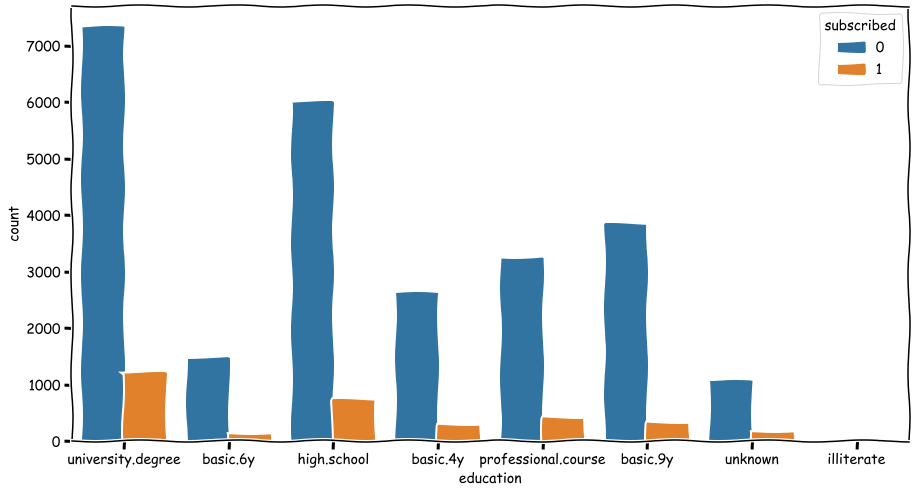

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x=df["education"],hue="subscribed" ,data=df)

<AxesSubplot:xlabel='subscribed', ylabel='count'>

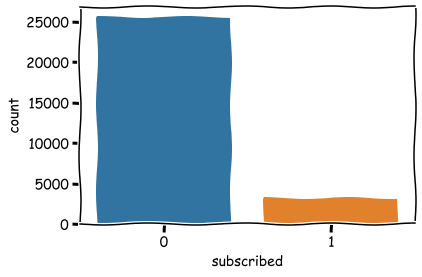

In [12]:
sns.countplot(x=df["subscribed"], data=df)

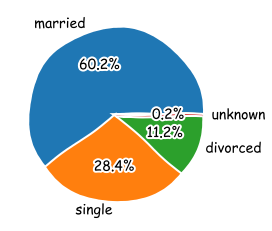

In [13]:
label = ["married", "single", "divorced", "unknown"]
plt.pie(df["marital"].value_counts(),autopct="%1.1f%%", labels=label)
plt.show()

In [14]:
df["marital"].value_counts()

married     17368
single       8189
divorced     3222
unknown        52
Name: marital, dtype: int64

In [15]:
df["loan"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

<AxesSubplot:xlabel='marital', ylabel='count'>

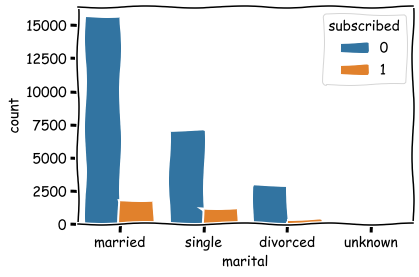

In [16]:
sns.countplot(x=df["marital"],hue=df["subscribed"], data=df)

In [17]:
df_subscribed = df.loc[df["subscribed"] == 1]
df_subscribed

,customer_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
25,customer_id_29276,51,technician,married,unknown,no,no,no,cellular,apr,fri,6.300000,1,999,0,nonexistent,-1.77,46.5375,-32.97,2.407,5099.1,1
31,customer_id_36604,52,technician,single,professional.course,no,yes,yes,cellular,jun,thu,2.666667,1,999,1,failure,-2.87,46.4815,-28.56,2.262,5076.2,1
35,customer_id_40049,45,self-employed,married,university.degree,no,no,no,cellular,jul,tue,6.433333,3,999,1,failure,-1.67,47.1075,-28.21,1.799,4991.6,1
43,customer_id_20549,34,technician,single,university.degree,no,no,no,cellular,aug,tue,7.200000,3,999,0,nonexistent,1.43,46.7220,-25.27,5.968,5228.1,1
45,customer_id_28162,34,blue-collar,married,basic.9y,no,unknown,unknown,cellular,apr,mon,17.716667,1,999,0,nonexistent,-1.77,46.5375,-32.97,2.468,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28756,customer_id_8529,41,admin.,married,high.school,no,yes,no,telephone,jun,wed,19.016667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.866,5228.1,1
28783,customer_id_35920,56,management,married,university.degree,no,no,no,cellular,may,mon,6.616667,1,999,1,failure,-1.77,46.4465,-32.34,2.266,5099.1,1
28785,customer_id_40994,56,services,divorced,high.school,no,yes,yes,cellular,oct,wed,2.966667,4,3,1,success,-1.07,47.3005,-34.65,2.018,4963.6,1
28790,customer_id_11016,33,blue-collar,married,basic.9y,no,yes,no,telephone,jun,wed,11.733333,4,999,0,nonexistent,1.43,47.2325,-29.26,5.964,5228.1,1


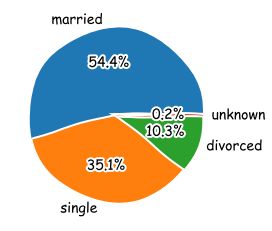

In [18]:
label = ["married", "single", "divorced", "unknown"]
plt.pie(df_subscribed["marital"].value_counts(),autopct="%1.1f%%", labels=label)
plt.show()

In [19]:
df.drop("customer_id", axis=1, inplace=True)

In [20]:
df_test.drop("customer_id", axis=1, inplace=True)

In [21]:
df_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,59,technician,married,high.school,no,no,yes,cellular,may,mon,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,57,unknown,married,unknown,unknown,yes,no,telephone,may,thu,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,35,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,38,admin.,married,high.school,no,no,no,telephone,jun,fri,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,29,housemaid,married,high.school,no,yes,no,cellular,jul,fri,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,48,services,married,high.school,no,yes,no,cellular,jul,mon,3.016667,2,999,0,nonexistent,1.43,46.9590,-29.89,5.962,5228.1
12353,40,services,divorced,high.school,unknown,yes,no,cellular,apr,tue,10.333333,1,2,1,success,-1.77,46.5375,-32.97,2.455,5099.1
12354,28,blue-collar,single,high.school,no,no,yes,telephone,jul,mon,4.183333,2,999,0,nonexistent,1.43,46.9590,-29.89,5.964,5228.1
12355,53,technician,divorced,professional.course,no,no,yes,cellular,aug,fri,0.833333,3,999,0,nonexistent,1.43,46.7220,-25.27,5.968,5228.1


In [22]:
df_cat = df.select_dtypes(include="object")
df_cat



,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,married,university.degree,no,no,no,cellular,dec,mon,failure
1,technician,single,university.degree,no,no,no,telephone,may,fri,nonexistent
2,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,nonexistent
3,services,married,university.degree,no,no,no,cellular,may,thu,failure
4,admin.,single,high.school,no,no,no,cellular,may,fri,nonexistent
...,...,...,...,...,...,...,...,...,...,...
28826,retired,married,professional.course,unknown,no,no,telephone,may,tue,nonexistent
28827,management,married,university.degree,no,no,no,telephone,jun,thu,nonexistent
28828,admin.,married,high.school,no,yes,no,cellular,oct,thu,success
28829,management,married,university.degree,no,yes,no,telephone,may,wed,nonexistent


In [23]:
df = pd.get_dummies(df)

In [24]:
df_test = pd.get_dummies(df_test)

# Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from lightgbm import LGBMClassifier

In [27]:
from rgf.sklearn import RGFClassifier

In [28]:
x = df.drop("subscribed", axis=1)
y= df["subscribed"]

In [53]:
rf = RandomForestClassifier(n_estimators=200,max_depth=3, random_state=42)
xgb = XGBClassifier(max_depth=3, n_estimators=200)
#lr = LogisticRegression(max_iter=100)
cat = CatBoostClassifier(verbose=False,max_depth=5, random_state=42, n_estimators=400)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=45)
lgm = LGBMClassifier()
rgfc = RGFClassifier()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    

In [47]:
estimator = []
estimator.append(("lgm", lgm))
estimator.append(("CAT", CatBoostClassifier(verbose=False)))
estimator.append(("RGF", rgfc))

In [54]:
vot_hard = VotingClassifier(estimators= estimator, voting="hard", n_jobs=-1)
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.9132998092595803

In [35]:

xgb.fit(x_train, y_train)
preds = xgb.predict(x_test)

score1 = accuracy_score(y_test, preds)
print(score1)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9105254031558869


In [36]:
lgm.fit(x_train, y_train)
preds_lgm = lgm.predict(x_test)
lgm_score = accuracy_score(y_test, preds)
lgm_score

0.9105254031558869

In [37]:
xgb.fit(x_train, y_train)
preds = xgb.predict(x_test)
score = accuracy_score(y_test, preds)
print(score)

[09:33:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9105254031558869


In [55]:
cat.fit(x_train, y_train)
preds_cat = cat.predict(x_test)
score_cat = accuracy_score(y_test, preds_cat)
print(score_cat)

0.9113924050632911


In [39]:
lgm.fit(x,y)
preds_lgm = lgm.predict(df_test)

In [56]:
vot_hard.fit(x,y)
preds_vot = vot_hard.predict(df_test)

In [60]:
cat.fit(x,y)
preds_cat = cat.predict(df_test)

In [61]:
sample["subscribed"]  = preds_cat

In [62]:
sample.subscribed.value_counts()


0    11230
1     1127
Name: subscribed, dtype: int64

In [63]:
sample.to_csv("submission61.csv", index=False)